In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
data_dir="E:/PROJECT 1/dataset/cropped"

In [3]:
data_dir

'E:/PROJECT 1/dataset/cropped'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('E:/PROJECT 1/dataset/cropped')

In [5]:
list(data_dir.glob('*/*.png'))[:5]

[WindowsPath('E:/PROJECT 1/dataset/cropped/ashwin/ashwin1.png'),
 WindowsPath('E:/PROJECT 1/dataset/cropped/ashwin/ashwin10.png'),
 WindowsPath('E:/PROJECT 1/dataset/cropped/ashwin/ashwin100.png'),
 WindowsPath('E:/PROJECT 1/dataset/cropped/ashwin/ashwin101.png'),
 WindowsPath('E:/PROJECT 1/dataset/cropped/ashwin/ashwin102.png')]

In [6]:
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

593


In [7]:
ashwin = list(data_dir.glob('ashwin/*'))
ashwin[:5]

[WindowsPath('E:/PROJECT 1/dataset/cropped/ashwin/ashwin1.png'),
 WindowsPath('E:/PROJECT 1/dataset/cropped/ashwin/ashwin10.png'),
 WindowsPath('E:/PROJECT 1/dataset/cropped/ashwin/ashwin100.png'),
 WindowsPath('E:/PROJECT 1/dataset/cropped/ashwin/ashwin101.png'),
 WindowsPath('E:/PROJECT 1/dataset/cropped/ashwin/ashwin102.png')]

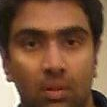

In [8]:
PIL.Image.open(str(ashwin[1]))

In [9]:
crickter_images_dict = {
    'ashwin': list(data_dir.glob('ashwin/*')),
    'dhoni': list(data_dir.glob('dhoni/*')),
    'kl rahul': list(data_dir.glob('kl rahul/*')),
    'rahul dravid': list(data_dir.glob('rahul dravid/*')),
    'rohith sharma': list(data_dir.glob('rohith sharma/*')),
    'virat kohli': list(data_dir.glob('virat kohli/*')),
}

In [10]:
crickter_labels_dic = {
    'ashwin': 0,
    'dhoni': 1,
    'kl rahul': 2,
    'rahul dravid': 3,
    'rohith sharma': 4,
    'virat kohli' : 5,
}

In [11]:
crickter_images_dict['ashwin'][:5]

[WindowsPath('E:/PROJECT 1/dataset/cropped/ashwin/ashwin1.png'),
 WindowsPath('E:/PROJECT 1/dataset/cropped/ashwin/ashwin10.png'),
 WindowsPath('E:/PROJECT 1/dataset/cropped/ashwin/ashwin100.png'),
 WindowsPath('E:/PROJECT 1/dataset/cropped/ashwin/ashwin101.png'),
 WindowsPath('E:/PROJECT 1/dataset/cropped/ashwin/ashwin102.png')]

In [12]:
str(crickter_images_dict['ashwin'][0])

'E:\\PROJECT 1\\dataset\\cropped\\ashwin\\ashwin1.png'

In [13]:
img = cv2.imread(str(crickter_images_dict['ashwin'][0]))

In [14]:
img = cv2.imread(str(crickter_images_dict['ashwin'][5]))

In [15]:
img.shape


(192, 192, 3)

In [16]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [17]:
X, y = [], []

for crickter_name, images in crickter_images_dict.items():
    #print(images)
    for image in images:
        img = cv2.imread(str(image))
        #print(img)
        resized_img = cv2.resize(img,(32,32))
        X.append(resized_img)
        y.append(crickter_labels_dic[crickter_name])

In [18]:
X

[array([[[189, 134, 167],
         [186, 130, 166],
         [184, 130, 167],
         ...,
         [ 12,   1,   6],
         [ 39,  21,  20],
         [ 44,  24,  16]],
 
        [[194, 139, 165],
         [185, 130, 175],
         [186, 132, 169],
         ...,
         [ 32,  29,  51],
         [ 13,  19,  24],
         [ 10,   2,   0]],
 
        [[194, 143, 176],
         [186, 133, 173],
         [188, 135, 174],
         ...,
         [ 53,  72,  89],
         [ 19,   3,  34],
         [  0,   1,   5]],
 
        ...,
 
        [[209, 173, 216],
         [204, 162, 203],
         [207, 167, 203],
         ...,
         [118, 107, 123],
         [ 88,  77,  97],
         [ 70,  71,  84]],
 
        [[207, 171, 214],
         [204, 165, 210],
         [207, 172, 211],
         ...,
         [128, 109, 129],
         [109, 106, 132],
         [121, 115, 147]],
 
        [[209, 174, 214],
         [208, 170, 215],
         [205, 164, 201],
         ...,
         [ 96,  81,  89],
  

In [19]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


In [20]:
X = np.array(X)
y = np.array(y)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=25)

In [22]:
X_train.shape

(444, 32, 32, 3)

In [23]:
X_test.shape

(149, 32, 32, 3)

In [24]:
y_train.shape

(444,)

In [25]:
y_train[:5]

array([0, 5, 0, 2, 0])

In [26]:
y_test[:5]

array([0, 3, 4, 0, 2])

In [27]:
classes=["ashwin","dhoni","kl rahul", "rahul dravid", "rohith sharma", "virat kohli"]

In [28]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

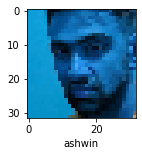

In [29]:
plot_sample(X_train, y_train, 0)

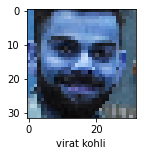

In [30]:
plot_sample(X_train, y_train, 1)

In [31]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [32]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [33]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=40)

Epoch 1/40
14/14 [==============================] - 3s 72ms/step - loss: 7.1734 - accuracy: 0.1712
Epoch 2/40
14/14 [==============================] - 1s 69ms/step - loss: 1.8259 - accuracy: 0.2275
Epoch 3/40
14/14 [==============================] - 1s 70ms/step - loss: 1.6590 - accuracy: 0.3198
Epoch 4/40
14/14 [==============================] - 1s 70ms/step - loss: 1.3970 - accuracy: 0.4437
Epoch 5/40
14/14 [==============================] - 1s 70ms/step - loss: 1.3053 - accuracy: 0.4977
Epoch 6/40
14/14 [==============================] - 1s 70ms/step - loss: 1.1289 - accuracy: 0.5766
Epoch 7/40
14/14 [==============================] - 1s 69ms/step - loss: 1.0029 - accuracy: 0.6509
Epoch 8/40
14/14 [==============================] - 1s 69ms/step - loss: 1.0132 - accuracy: 0.6104
Epoch 9/40
14/14 [==============================] - 1s 69ms/step - loss: 0.9151 - accuracy: 0.6396 0s - loss:
Epoch 10/40
14/14 [==============================] - 1s 69ms/step - loss: 0.7928 - accuracy: 0.718

In [34]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.64      0.63        28
           1       0.67      0.62      0.64        29
           2       0.83      0.79      0.81        19
           3       0.78      0.83      0.81        30
           4       0.67      0.64      0.65        22
           5       0.73      0.76      0.74        21

    accuracy                           0.71       149
   macro avg       0.72      0.71      0.71       149
weighted avg       0.71      0.71      0.71       149



In [35]:
ann.evaluate(X_test,y_test)

5/5 [==============================] - 0s 16ms/step - loss: 1.1694 - accuracy: 0.7114


[1.1694313287734985, 0.7114093899726868]

In [36]:
y_pred = ann.predict(X_test)
y_pred[:5]

array([[9.99247432e-01, 5.07367949e-05, 1.40966980e-08, 6.96099421e-04,
        5.69712165e-06, 8.98030947e-08, 1.58806371e-11, 2.63866040e-10,
        2.00116625e-11, 3.98699684e-11],
       [9.97430878e-04, 1.90471988e-02, 1.21817153e-04, 9.79391515e-01,
        2.92871176e-04, 1.48706647e-04, 1.06871063e-07, 1.04458735e-07,
        1.34829193e-07, 1.47583222e-07],
       [1.50841766e-03, 5.12572471e-03, 4.79369555e-05, 9.93317604e-01,
        1.58819418e-07, 1.51923942e-07, 2.29354521e-11, 3.51466564e-11,
        1.05853798e-10, 7.99758315e-11],
       [7.83777311e-02, 9.49567929e-03, 1.17828229e-07, 9.02019382e-01,
        4.71959077e-03, 5.38742868e-03, 8.32562375e-09, 8.22430053e-08,
        9.59246105e-09, 1.90659755e-08],
       [2.83535686e-03, 1.03918910e-06, 9.97089088e-01, 1.33231333e-06,
        6.22285052e-06, 6.70392619e-05, 5.81513282e-10, 5.47637109e-11,
        6.71728451e-10, 3.25100641e-10]], dtype=float32)

In [37]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:15]

[0, 3, 3, 3, 2, 0, 3, 2, 0, 0, 5, 3, 3, 4, 4]

In [38]:
y_test[:15]

array([0, 3, 4, 0, 2, 1, 3, 5, 0, 0, 4, 3, 0, 4, 4])

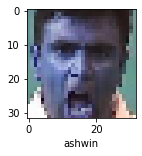

In [39]:
plot_sample(X_test, y_test,0)

In [40]:
classes[y_classes[0]]

'ashwin'

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_classes)
cm

array([[18,  3,  1,  3,  3,  0],
       [ 7, 18,  0,  1,  3,  0],
       [ 2,  0, 15,  0,  0,  2],
       [ 0,  3,  0, 25,  0,  2],
       [ 1,  3,  1,  1, 14,  2],
       [ 1,  0,  1,  2,  1, 16]], dtype=int64)

Text(69.0, 0.5, 'Truth')

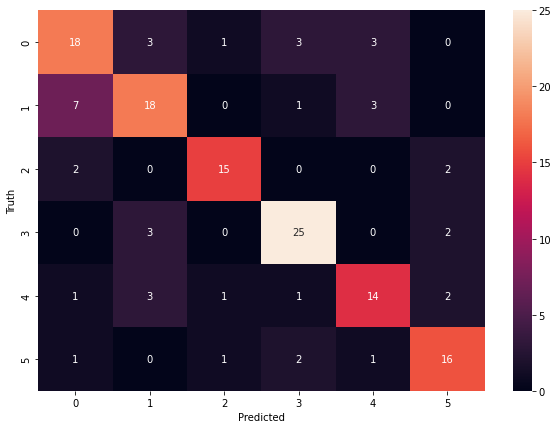

In [42]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [43]:
cnn = models.Sequential([
    layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    #layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    #layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='softmax'),
    layers.MaxPooling2D((2, 2)),
    
    
    layers.Flatten(),
    #layers.Dense(128, activation='mish','swish'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [44]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [45]:
cnn.fit(X_train, y_train, epochs=40)

Epoch 1/40
14/14 [==============================] - 3s 102ms/step - loss: 2.2037 - accuracy: 0.1509
Epoch 2/40
14/14 [==============================] - 1s 101ms/step - loss: 1.9829 - accuracy: 0.1914
Epoch 3/40
14/14 [==============================] - 2s 107ms/step - loss: 1.8719 - accuracy: 0.2005
Epoch 4/40
14/14 [==============================] - 2s 111ms/step - loss: 1.8137 - accuracy: 0.2185
Epoch 5/40
14/14 [==============================] - 2s 106ms/step - loss: 1.7524 - accuracy: 0.3514
Epoch 6/40
14/14 [==============================] - 2s 130ms/step - loss: 1.6904 - accuracy: 0.3153
Epoch 7/40
14/14 [==============================] - 2s 147ms/step - loss: 1.6125 - accuracy: 0.3964
Epoch 8/40
14/14 [==============================] - 2s 151ms/step - loss: 1.4901 - accuracy: 0.5248
Epoch 9/40
14/14 [==============================] - 2s 151ms/step - loss: 1.3724 - accuracy: 0.5653
Epoch 10/40
14/14 [==============================] - 2s 148ms/step - loss: 1.2690 - accuracy: 0.5586

In [46]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.57      0.62        28
           1       0.68      0.59      0.63        29
           2       0.82      0.95      0.88        19
           3       0.69      0.83      0.76        30
           4       0.67      0.55      0.60        22
           5       0.75      0.86      0.80        21

    accuracy                           0.71       149
   macro avg       0.71      0.72      0.71       149
weighted avg       0.71      0.71      0.70       149



In [47]:
cnn.evaluate(X_test,y_test)

5/5 [==============================] - 0s 46ms/step - loss: 0.9731 - accuracy: 0.7114


[0.9731276631355286, 0.7114093899726868]

In [48]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[8.46578181e-01, 1.68206021e-02, 3.93563043e-03, 1.24278910e-01,
        4.26062674e-04, 7.94971455e-03, 2.82792229e-07, 2.28137674e-06,
        4.67784787e-07, 7.76618162e-06],
       [1.55509170e-03, 2.58550085e-02, 4.71596177e-05, 9.69067395e-01,
        3.46111716e-03, 1.41084611e-05, 1.00330499e-09, 3.97345943e-08,
        4.77700590e-09, 1.64128807e-07],
       [3.77555266e-02, 5.15262187e-01, 4.54877876e-02, 3.67804766e-01,
        1.08242966e-02, 2.28198152e-02, 7.49578305e-07, 1.30011322e-05,
        2.12495684e-06, 2.96656981e-05],
       [7.89637268e-01, 2.81742979e-02, 2.56545114e-04, 1.08137496e-01,
        3.22610475e-02, 4.15256880e-02, 4.68993477e-07, 2.49774575e-06,
        3.57311364e-07, 4.34585490e-06],
       [4.03789915e-02, 4.82253643e-04, 9.55932081e-01, 1.11790420e-03,
        5.42212627e-04, 1.54411641e-03, 2.67905136e-07, 8.86932469e-07,
        2.00484124e-07, 1.06125299e-06]], dtype=float32)

In [49]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:15]

[0, 3, 1, 0, 2, 4, 3, 5, 0, 0, 5, 1, 1, 3, 4]

In [50]:
y_test[:15]

array([0, 3, 4, 0, 2, 1, 3, 5, 0, 0, 4, 3, 0, 4, 4])

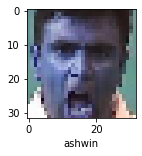

In [51]:
plot_sample(X_test, y_test,0)

In [52]:
classes[y_classes[0]]

'ashwin'

In [53]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_classes)
cm

array([[16,  4,  2,  5,  1,  0],
       [ 6, 17,  0,  3,  2,  1],
       [ 0,  0, 18,  0,  1,  0],
       [ 0,  3,  1, 25,  0,  1],
       [ 2,  1,  0,  3, 12,  4],
       [ 0,  0,  1,  0,  2, 18]], dtype=int64)

Text(69.0, 0.5, 'Truth')

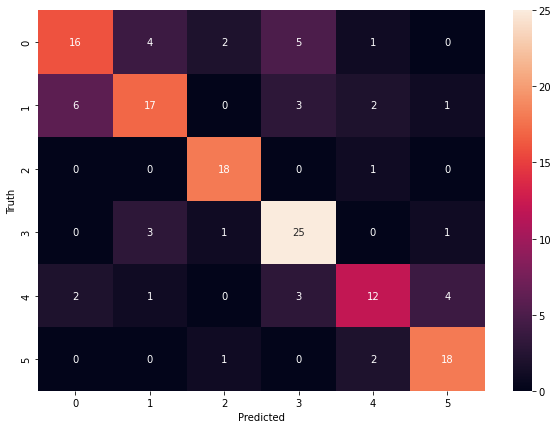

In [54]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [55]:
cnn1 = models.Sequential([
    layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='softmax'),
    layers.MaxPooling2D((2, 2)),
    
    
    layers.Flatten(),
    layers.Dense(128, activation='softmax'),
    layers.Dense(10, activation='relu'),
    #layers.Dense(32, activation='softmax'),
    #layers.Dense(16, activation='softmax')
])

In [56]:
cnn1.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [57]:
cnn1.fit(X_train, y_train, epochs=40)

Epoch 1/40
14/14 [==============================] - 4s 212ms/step - loss: 3.3076 - accuracy: 0.2050
Epoch 2/40
14/14 [==============================] - 3s 251ms/step - loss: 2.3026 - accuracy: 0.1937
Epoch 3/40
14/14 [==============================] - 3s 249ms/step - loss: 2.3026 - accuracy: 0.1937
Epoch 4/40
14/14 [==============================] - 3s 235ms/step - loss: 2.3026 - accuracy: 0.1937
Epoch 5/40
14/14 [==============================] - 3s 219ms/step - loss: 2.3026 - accuracy: 0.1937
Epoch 6/40
14/14 [==============================] - 3s 206ms/step - loss: 2.3026 - accuracy: 0.1937
Epoch 7/40
14/14 [==============================] - 3s 205ms/step - loss: 2.3026 - accuracy: 0.1937
Epoch 8/40
14/14 [==============================] - 3s 203ms/step - loss: 2.3026 - accuracy: 0.1937
Epoch 9/40
14/14 [==============================] - 3s 200ms/step - loss: 2.3026 - accuracy: 0.1937
Epoch 10/40
14/14 [==============================] - 3s 200ms/step - loss: 2.3026 - accuracy: 0.1937

In [58]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn1.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.19      1.00      0.32        28
           1       0.00      0.00      0.00        29
           2       0.00      0.00      0.00        19
           3       0.00      0.00      0.00        30
           4       0.00      0.00      0.00        22
           5       0.00      0.00      0.00        21

    accuracy                           0.19       149
   macro avg       0.03      0.17      0.05       149
weighted avg       0.04      0.19      0.06       149



D:\DOWNLOADS\Anconda\envs\imageclassification\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\DOWNLOADS\Anconda\envs\imageclassification\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\DOWNLOADS\Anconda\envs\imageclassification\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [59]:
cnn1.evaluate(X_test,y_test)

5/5 [==============================] - 1s 48ms/step - loss: 2.3026 - accuracy: 0.1879


[2.3025851249694824, 0.1879194676876068]

In [60]:
model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('relu'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=40)

NameError: name 'Conv2D' is not defined

In [ ]:
model.evaluate(X_test,y_test)